# Are Americans Financially Literate?

### My Motivation

Ever since grad school and my time in education, this question has been pondering in my head almost to an annoying level, as it's a serious problem that we're facing in this country, and that is....

_Most Americans do not know what they're doing with their money._

Here is the formal definition of [financial literacy](https://www.investopedia.com/terms/f/financial-literacy.asp): 

>Financial literacy is the education and understanding of various financial areas including topics related to managing personal finance, money and investing. This topic focuses on the ability to manage personal finance matters in an efficient manner, and it includes the knowledge of making appropriate decisions about personal finance such as investing, insurance, real estate, paying for college, budgeting, retirement and tax planning.


I explored the world of financial literacy in my Master's program at University of Pennsylvania, where I participated and investigated the effects of Wharton's [Bridges to Wealth](http://www.bridgestowealth.org/) program.  Big realizations were made here:

1) When young people are **properly educated** about compound interest, they are very likely to start investing.

2) **Collaboration** and group-led **discussions** are an integral part of bringing new people into the practice of investing.

3) **Barriers to access** is a very real problem in impoverished urban areas, where much needed credit unions are scarce or simply quiet.

4) The **social capital** that you have from your environment strongly dictates how you're going to manage your money.

5) **Home-owners** are more likely to spend their money wisely than **renters**. 

These realizations, which were then fleshed out in my thesis, were backed by **personal observations**, **survey data**, and **interviews**. But as I reflect about the thesis I wrote three years ago, I wish that my analysis contained more stats to quantify my realizations: my foundings were determined by a taking a _qualitative_ approach on the data, building up a narrative about attributes that _could potentially_ affect financial literacy.

Therefore, my motivation with this project is to justify these realizations with statistics. In other words, I want to approach this project in the eyes of a **data scientist**.

So, let's go!
___________________________________________________

### The Data

The [National Financial Capability Study](http://www.usfinancialcapability.org/downloads.php) assesses the overall financial capability of the national population. Data collection was done by each state across a large sample. I obtained their data over a Google Scholar search. 

I wrote and ran two python files in order to process the data in a format I wanted, in addition to aggregating over certain columns in order to generate a new metric. One of the python files just stored dictionaries of key-value pairs that allowed to convert labels, and the other python file behaved like a pipeline, cleaning up the data and adding more attributes. After I run the code, a new dataframe is generated and saved in a csv, called ```correct_data.csv```, which can now allow me to play with it in this jupyter notebook.

Here's a glimpse of the processed data:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./correct_data.csv")

df.head(10)


,NFCSID,State,CensusDivision,CensusRegion,Gender,AgeGroup,Gender/AgeNet,Ethnicity,HighestLevelEducation,MaritalStatus,...,FinancialTestQ1,FinancialTestQ2,FinancialTestQ3,FinancialTestQ4,FinancialTestQ5,FinancialTestQ6,NationalWeightByAgeGenderEthnicityEducationCensusDivision,DivisionalWeightByAgeGenderEthnicityEducationState,StateWeightByAgeGenderEthnicityEducation,financialliteracyscore
0,2015010001,Arizona,Mountain,West,Male,65+,6,White,"College, no degree",Divorced,...,3,3,0,0,1,0,0.536725,2.758128,1.287577,18.518519
1,2015010002,Ohio,East North Central,Midwest,Female,55-64,11,White,"College, no degree",Widowed/Widower,...,1,3,0,2,1,0,1.663579,1.587114,1.022437,22.222222
2,2015010003,New York,Middle Atlantic,Northeast,Female,25-34,8,White,Bachelor's,Married,...,1,0,0,0,1,0,0.708960,0.823015,0.823240,14.814815
3,2015010004,Florida,South Atlantic,South,Female,35-44,9,Non-White,GED or alternative,Divorced,...,3,0,0,0,1,0,2.031946,2.983356,1.020086,7.407407
4,2015010005,New Jersey,Middle Atlantic,Northeast,Male,55-64,5,White,HS diploma,Single,...,1,0,0,0,1,2,2.521054,0.980330,1.145100,22.222222
5,2015010006,Missouri,West North Central,Midwest,Male,65+,6,White,Post Graduate,Married,...,1,3,2,2,1,2,0.395068,1.682096,0.788287,51.851852
6,2015010007,Florida,South Atlantic,South,Male,35-44,3,Non-White,Bachelor's,Married,...,0,0,0,0,0,2,1.570852,2.298935,0.776923,7.407407
7,2015010008,Arizona,Mountain,West,Female,35-44,9,Non-White,Did not complete HS,Single,...,0,1,0,0,0,0,0.308107,2.172517,1.072801,7.407407
8,2015010009,South Carolina,South Atlantic,South,Female,65+,12,Non-White,Post Graduate,Divorced,...,2,3,4,2,1,0,0.960049,0.528338,0.772425,11.111111
9,2015010010,New York,Middle Atlantic,Northeast,Male,18-24,1,Non-White,Bachelor's,Single,...,0,0,3,0,0,2,1.118281,0.756921,0.742193,3.703704


So, let's take a look at some simple stats first

In [3]:
df.describe()

,NFCSID,Gender/AgeNet,MaritalStatusVariable,Dependents,USVeteran?,X3,HouseholdRetirementStatus,SatisfactionLevelCurrentFinances,WillingnessFinancialRisk,SpendingVsIncome,...,FinancialTestQ1,FinancialTestQ2,FinancialTestQ3,FinancialTestQ4,FinancialTestQ5,FinancialTestQ6,NationalWeightByAgeGenderEthnicityEducationCensusDivision,DivisionalWeightByAgeGenderEthnicityEducationState,StateWeightByAgeGenderEthnicityEducation,financialliteracyscore
count,2.756400e+04,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,...,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000,27564.000000
mean,2.015024e+09,7.005260,1.842621,4.193550,4.083805,1.026665,1.219743,6.311711,5.536678,5.255805,...,1.837614,3.019990,2.069765,3.084712,1.480010,1.736468,1.000000,1.000000,1.000000,36.369768
std,7.957186e+03,3.353802,0.952244,1.899293,10.849597,0.161106,0.436432,7.914419,7.348415,17.507562,...,8.695966,9.205448,8.861020,10.568376,7.371834,8.094263,0.604015,0.722603,0.350282,18.175437
min,2.015010e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179439,0.041745,0.180210,-7.407407
25%,2.015017e+09,4.000000,1.000000,2.000000,3.000000,1.000000,1.000000,4.000000,3.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.525292,0.469758,0.807126,22.222222
50%,2.015024e+09,7.000000,1.000000,5.000000,3.000000,1.000000,1.000000,6.000000,5.000000,2.000000,...,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.869152,0.827975,1.010786,37.037037
75%,2.015031e+09,10.000000,3.000000,6.000000,3.000000,1.000000,1.000000,8.000000,7.000000,3.000000,...,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,1.357356,1.361294,1.127592,51.851852
max,2.015038e+09,12.000000,3.000000,6.000000,99.000000,2.000000,3.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,4.836112,4.271710,8.940685,85.185185


The data is a lot. Notice that there's an ellipses after the SpendingVsIncome column, indicating that many other columns aren't printed on the screen.

Let's pick out some interesting columns to start.

I want to start with the ```financialliteracyscore``` column, as this is the column that I created. It measures a person's level of comprehension on financial literacy. I created this metric based on the definition mentioned earlier: the **knowledge of compound interest**, the practice of **planning for the future**, and basic **money management**, including budgeting and owning a savings account*. 

*_By the way, the nitty-gritty of how I went about this is in my prior blog post, [Playing with Financial Literacy Data](https://ekeleshian.github.io/playing-with-data/)_.

In [4]:
df['financialliteracyscore'].describe()

count    27564.000000
mean        36.369768
std         18.175437
min         -7.407407
25%         22.222222
50%         37.037037
75%         51.851852
max         85.185185
Name: financialliteracyscore, dtype: float64


_Side note: the lowest score here is negative because some of the columns I aggregated over were metrics that would pull the score down. For instance, if a surveyee answered that they have too much debt, their score went down two points; if they use their credit cards for a cash advance, the score went down one point. The weight of this negative score was arbitruary somewhat, just based on my own perception about how bad that quality is relative to the other negative attributes. The entire rubric I created is in my prior blog [Playing with Financial Literacy Data](https://ekeleshian.github.io/playing-with-data/)_; *the rubric is called* ```dictionary_of_parameters``` *for reference.*

In [5]:
import decimal

def rounding(num):
    num = decimal.Decimal(num)
    return round(num, 2)
    
percentile_75 = df['financialliteracyscore'].quantile(q=.75)
percentile_98 = df['financialliteracyscore'].quantile(q=.98)

print(f'Financial literacy score in the 75th percentile: {rounding(percentile_75)}%')
print(f'Financial literacy score in the 98th percentile: {rounding(percentile_98)}%')

Financial literacy score in the 75th percentile: 51.85%
Financial literacy score in the 98th percentile: 70.37%


Already, the stats looks alarming.  75% of surveyees score around 50% on this financial literacy assessment, meaning three-fourths of Americans failed the test.

Furthermore, **only 2%** of Americans know a decent amount of financial literacy, as they passed the test.

I feel like I have seen this 2% with regards to people and money before....

![Homer thinking](homer_thinking.jpg)

What I really want to do now is to partition the data into two groups: those who failed the test (98% of the paricipants) vs those who didn't (2% of the participants).  Then, with feature engineering, I can hopefully figure out the particular factors that determine financial literacy proficiency.

But before I do that, I need to make sure that this partition is reasonable, as it was determined by a metric that I created.  So, I will test my financial literacy metric by comparing the two groups with parameters that I did not use in my financial literacy metric calculation.

In turn, I will compare the two groups by the following parameters:

1) Household Income

2) Highest level of education

3) Whether they received financial education at work, school, or at home.

4) Own a home

5) Math abilities

These parameters typically correlate with financial literacy competence, but they're not included in my financial literacy metric. If my financial literacy metric is a reliable one, then these parameters should correlate nicely with the test results.

___________________________________________________



### Partitioning the data

In [6]:
bottom_98 = df[df['financialliteracyscore'] <= 70.37]

In [7]:
bottom_98.describe()

,NFCSID,Gender/AgeNet,MaritalStatusVariable,Dependents,USVeteran?,X3,HouseholdRetirementStatus,SatisfactionLevelCurrentFinances,WillingnessFinancialRisk,SpendingVsIncome,...,FinancialTestQ1,FinancialTestQ2,FinancialTestQ3,FinancialTestQ4,FinancialTestQ5,FinancialTestQ6,NationalWeightByAgeGenderEthnicityEducationCensusDivision,DivisionalWeightByAgeGenderEthnicityEducationState,StateWeightByAgeGenderEthnicityEducation,financialliteracyscore
count,2.662300e+04,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,...,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000,26623.000000
mean,2.015024e+09,7.024453,1.856215,4.191902,4.119258,1.027007,1.214401,6.224618,5.479172,5.395523,...,1.866281,3.023476,2.072982,3.107276,1.496939,1.730233,1.005478,1.004741,1.003282,35.065754
std,7.975077e+03,3.360019,0.953891,1.903626,10.990473,0.162106,0.433384,8.036495,7.459439,17.797757,...,8.846872,9.366426,8.995828,10.719432,7.500386,8.235711,0.605283,0.725212,0.352015,17.081506
min,2.015010e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179439,0.041745,0.180210,-7.407407
25%,2.015017e+09,4.000000,1.000000,2.000000,3.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.525292,0.475520,0.809064,22.222222
50%,2.015024e+09,7.000000,1.000000,5.000000,3.000000,1.000000,1.000000,6.000000,5.000000,2.000000,...,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.869152,0.835671,1.014797,33.333333
75%,2.015031e+09,10.000000,3.000000,6.000000,3.000000,1.000000,1.000000,8.000000,7.000000,3.000000,...,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,1.364961,1.367251,1.130125,48.148148
max,2.015038e+09,12.000000,3.000000,6.000000,99.000000,2.000000,3.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,4.836112,4.271710,8.940685,66.666667


In [8]:
top_2 = df[df['financialliteracyscore'] > 70.37]

In [9]:
top_2.describe()

,NFCSID,Gender/AgeNet,MaritalStatusVariable,Dependents,USVeteran?,X3,HouseholdRetirementStatus,SatisfactionLevelCurrentFinances,WillingnessFinancialRisk,SpendingVsIncome,...,FinancialTestQ1,FinancialTestQ2,FinancialTestQ3,FinancialTestQ4,FinancialTestQ5,FinancialTestQ6,NationalWeightByAgeGenderEthnicityEducationCensusDivision,DivisionalWeightByAgeGenderEthnicityEducationState,StateWeightByAgeGenderEthnicityEducation,financialliteracyscore
count,9.410000e+02,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,...,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,2.015025e+09,6.462274,1.458023,4.240170,3.080765,1.017003,1.370882,8.775770,7.163656,1.302869,...,1.026567,2.921360,1.978746,2.446334,1.001063,1.912859,0.845002,0.865872,0.907145,73.263274
std,7.283431e+03,3.126059,0.815796,1.772641,5.446047,0.129352,0.492024,1.124054,2.179888,0.693957,...,0.207148,0.386171,3.227471,4.507268,0.134477,0.370242,0.544869,0.630123,0.281799,3.503042
min,2.015010e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221003,0.041908,0.346302,70.370370
25%,2.015020e+09,4.000000,1.000000,2.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,...,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.406092,0.381779,0.737559,70.370370
50%,2.015026e+09,6.000000,1.000000,5.000000,3.000000,1.000000,1.000000,9.000000,8.000000,1.000000,...,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.624350,0.729137,0.845267,74.074074
75%,2.015031e+09,9.000000,1.000000,5.000000,3.000000,1.000000,2.000000,10.000000,9.000000,1.000000,...,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,1.151432,1.173573,1.068529,74.074074
max,2.015037e+09,12.000000,3.000000,6.000000,99.000000,2.000000,3.000000,10.000000,10.000000,3.000000,...,3.000000,3.000000,99.000000,99.000000,2.000000,2.000000,4.836112,3.432999,3.458004,85.185185


____________________________________________________
## Comparing Household Income

As mentioned before, I will first verify that my financial literacy metric is a reliable one, by comparing it with certain attributes that weren't used to calculate the metric. First, I will compare their household income.  

_As a side note: since we're dealing with uneven sample sizes, metrics will be determined in relative terms, i.e. percentages._

In [10]:
def percent_calculator(df, **kwargs):
    for key, value in kwargs.items():
        if key == 'column':
            label = value
        if key == 'response':
            response = value
    numerator = df[df[label] == response][label].count()
    no_nulls = df[df[label] != 99]
    denominator = no_nulls[label].count()
    return rounding(numerator*1.0/denominator * 100)

In [11]:
income_98 = bottom_98['HouseholdIncome']
income_98.value_counts().plot('bar')

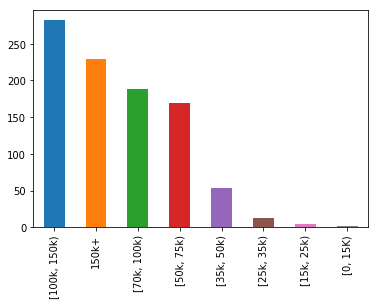

In [12]:
income_2 = top_2['HouseholdIncome']
income_2.value_counts().plot('bar')

In [13]:
income_98.value_counts(normalize = True)


[50k, 75k)      0.205875
[35k, 50k)      0.150133
[70k, 100k)     0.133569
[0, 15K)        0.118694
[100k, 150k)    0.115915
[15k, 25k)      0.112046
[25k, 35k)      0.111783
150k+           0.051985
Name: HouseholdIncome, dtype: float64

In [14]:
income_2.value_counts(normalize = True)

[100k, 150k)    0.299681
150k+           0.243358
[70k, 100k)     0.200850
[50k, 75k)      0.179596
[35k, 50k)      0.056323
[25k, 35k)      0.013815
[15k, 25k)      0.004251
[0, 15K)        0.002125
Name: HouseholdIncome, dtype: float64

In [15]:
print(f'Percent of low-income surveyees from the bottom 98%: {rounding((0.118694 + 0.112046+ 0.111783)*100)}%')
print(f'Percent of low-income surveyees from the top 2%: {rounding((0.002125 + 0.004251 + 0.013815)*100)}%')

Percent of low-income surveyees from the bottom 98%: 34.25%
Percent of low-income surveyees from the top 2%: 2.02%


In [16]:
print(f'Percent of surveyees with income more than 100K from the bottom 98%: {rounding((0.115915 +0.051985)*100)}%')
print(f'Percent of surveyees with income more than 100K from the top 2%: {rounding((0.299681 + 0.243358)*100)}%')

Percent of surveyees with income more than 100K from the bottom 98%: 16.79%
Percent of surveyees with income more than 100K from the top 2%: 54.30%


Those in the top 2% significantly earn more money than the bottom 98%.  Since income typically correlates with financial literacy, we're off to a good start.
___________________________________________________________________

## Comparing Level of Education

In [17]:
education_98 = bottom_98['HighestLevelEducation']
education_2 = top_2['HighestLevelEducation']
education_98.value_counts(normalize = True)


College, no degree     0.284866
Bachelor's             0.225482
HS diploma             0.165045
Post Graduate          0.128686
Associate's            0.110356
GED or alternative     0.063366
Did not complete HS    0.022199
Name: HighestLevelEducation, dtype: float64

In [18]:
education_2.value_counts(normalize=True)

Post Graduate         0.341126
Bachelor's            0.334750
College, no degree    0.164718
Associate's           0.091392
HS diploma            0.056323
GED or alternative    0.011690
Name: HighestLevelEducation, dtype: float64

In [19]:
print(f'Percent of surveyees from bottom 98% who did not attend college: {rounding((0.284866+ 0.165045+ 0.022199+0.063366)*100)}%')

Percent of surveyees from bottom 98% who did not attend college: 53.55%


In [20]:
print(f'Percent of surveyees from top 2% who did not attend college: {rounding((0.164718+ 0.056323+0.011690 )*100)}%')

Percent of surveyees from top 2% who did not attend college: 23.27%


According to the percentages above, those in the top 2% are relatively more educated. This correlates nicely with the financial literacy metric. 

__________________________________________________________________

## Comparing Financial Education

In [21]:
target = ["FinancialEducationOfferedAtSchoolOrWork?", 
          "ReceiveFinancialEducationInHighSchool?",
          "ReceiveFinancialEducationInCollege?", 
          "ReceiveFinancialEducationFromWork?",
          "ReceiveFinancialEducationFromMilitary?",
          "ParentsTeachYouAboutFinance?",
         ]

Text(0,12000,'0 = IDK\n1 = Yes, but did not participate \n2 = Yes, and participate \n3 = No')

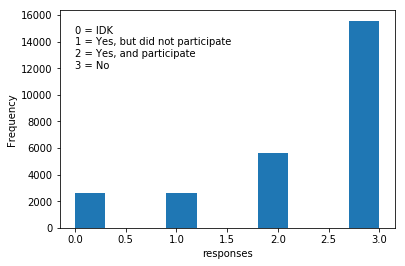

In [42]:
fin_ed_98 = bottom_98[target]

fin_ed_98 = fin_ed_98[fin_ed_98['FinancialEducationOfferedAtSchoolOrWork?']!= 99]
# fin_ed_98.hist(column = "FinancialEducationOfferedAtSchoolOrWork?")
import matplotlib.pyplot as plt

plt.hist(fin_ed_98['FinancialEducationOfferedAtSchoolOrWork?'])
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.text(0, 12000, '0 = IDK\n1 = Yes, but did not participate \n2 = Yes, and participate \n3 = No')

Text(0,350,'0 = IDK\n1 = Yes, but did not participate \n2 = Yes, and participate \n3 = No')

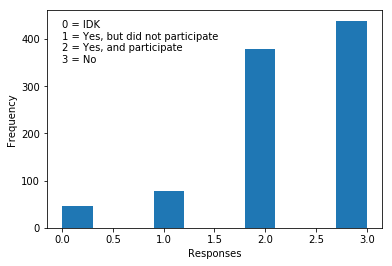

In [70]:
fin_ed_2 = top_2[target]
fin_ed_2 = fin_ed_2[fin_ed_2['FinancialEducationOfferedAtSchoolOrWork?']!=99]

plt.hist(fin_ed_2['FinancialEducationOfferedAtSchoolOrWork?'])
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.text(0, 350, '0 = IDK\n1 = Yes, but did not participate \n2 = Yes, and participate \n3 = No')

In [48]:
fin_ed_2['FinancialEducationOfferedAtSchoolOrWork?'].value_counts(normalize=True)

3    0.467021
2    0.402128
1    0.081915
0    0.048936
Name: FinancialEducationOfferedAtSchoolOrWork?, dtype: float64

In [49]:
fin_ed_98['FinancialEducationOfferedAtSchoolOrWork?'].value_counts(normalize=True)

3    0.588611
2    0.212364
1    0.099683
0    0.099343
Name: FinancialEducationOfferedAtSchoolOrWork?, dtype: float64

**40% of the top 2** received financial education from school/work, and only **21% of the bottom 98** received financial education from school/work. 


Text(0,12000,'0 = IDK\n1 = Yes\n2 = No')

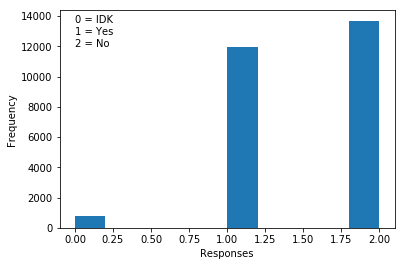

In [61]:
fin_ed_98 = bottom_98[target]
fin_ed_copy_98=fin_ed_98.copy()
fin_ed_copy_98 = fin_ed_copy_98[fin_ed_copy_98['ParentsTeachYouAboutFinance?'] != 99]

plt.hist(fin_ed_copy_98["ParentsTeachYouAboutFinance?"])
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.text(0, 12000, '0 = IDK\n1 = Yes\n2 = No')


Text(0,600,'0 = IDK\n1 = Yes\n2 = No')

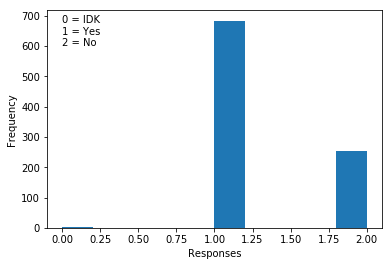

In [63]:
fin_ed_2 = top_2[target]
fin_ed_copy_2=fin_ed_2.copy()
fin_ed_copy_2 = fin_ed_copy_2[fin_ed_copy_2['ParentsTeachYouAboutFinance?'] != 99]

plt.hist(fin_ed_copy_2["ParentsTeachYouAboutFinance?"])
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.text(0, 600, '0 = IDK\n1 = Yes\n2 = No')

In [66]:
fin_ed_copy_98['ParentsTeachYouAboutFinance?'].value_counts(normalize=True)

2    0.518070
1    0.452904
0    0.029026
Name: ParentsTeachYouAboutFinance?, dtype: float64

In [67]:
fin_ed_copy_2['ParentsTeachYouAboutFinance?'].value_counts(normalize=True)

1    0.726886
2    0.270988
0    0.002125
Name: ParentsTeachYouAboutFinance?, dtype: float64

**45% from the bottom 98** claimed that their parents taught them about finance, as opposed to **73% from the top 2** 

________________________________________________

So far, I have demonstrated stark constrasts between the two groups by comparing attributes that weren't included in my financial literacy metric.  This means that I am on the right track in terms of verifying that this partition makes sense. I have two more comparisons to make, the next one being owning a home.

## Comparing Home Ownership

Text(0,12000,'0 = IDK\n1 = Yes\n2 = No')

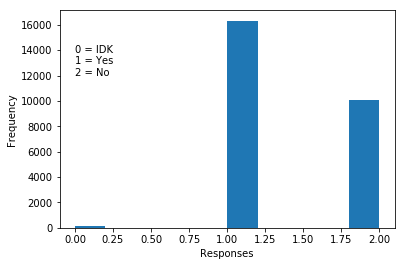

In [72]:
copy_bottom_98 = bottom_98.copy()
copy_bottom_98 = copy_bottom_98[copy_bottom_98['OwnHome?']!=99]
plt.hist(copy_bottom_98["OwnHome?"])
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.text(0, 12000, '0 = IDK\n1 = Yes\n2 = No')

Text(0,300,'0 = IDK\n1 = Yes\n2 = No')

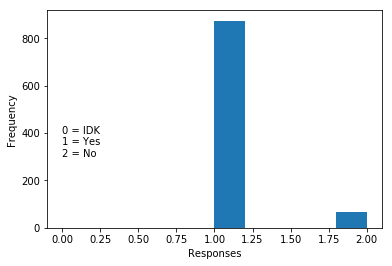

In [74]:
copy_top_2 = top_2.copy()
copy_top_2 = copy_top_2[copy_top_2['OwnHome?']!=99]
plt.hist(copy_top_2["OwnHome?"])
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.text(0, 300, '0 = IDK\n1 = Yes\n2 = No')

In [78]:
copy_bottom_98['OwnHome?'].value_counts(normalize =True)


1    0.61616
2    0.37946
0    0.00438
Name: OwnHome?, dtype: float64

In [76]:
copy_top_2['OwnHome?'].value_counts(normalize=True)

1    0.928799
2    0.070138
0    0.001063
Name: OwnHome?, dtype: float64

**38% of the bottom 98** don't own a home, as opposed to **7% of the top 2**.

______________________________________________________________

## Comparing Math Ability

This is the last attribute I will use to compare the split and hopefully will be able to validate my partitioning.

Text(0,8000,'0 = IDK\n1 = Strongly Disagree \n4 = Neither agree nor disagree \n7 = Strongly Agree')

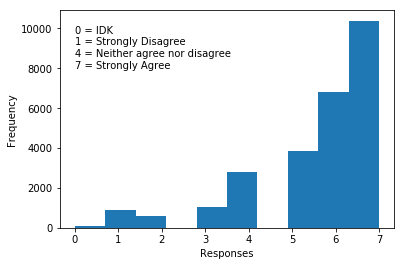

In [81]:
copy_math_98 = bottom_98[bottom_98['GoodAtMath?']!=99]
plt.hist(copy_math_98["GoodAtMath?"])
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.text(0, 8000, '0 = IDK\n1 = Strongly Disagree \n4 = Neither agree nor disagree \n7 = Strongly Agree')

Text(1,600,'0 = IDK\n1 = Strongly Disagree \n4 = Neither agree nor disagree \n7 = Strongly Agree')

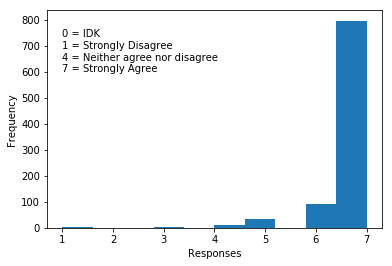

In [83]:
copy_math_2 =top_2[top_2['GoodAtMath?']!=99]
plt.hist(copy_math_2["GoodAtMath?"])
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.text(1, 600, '0 = IDK\n1 = Strongly Disagree \n4 = Neither agree nor disagree \n7 = Strongly Agree')

In [84]:
copy_math_98['GoodAtMath?'].value_counts(normalize=True)

7    0.391393
6    0.256746
5    0.145802
4    0.105781
3    0.039833
1    0.034255
2    0.022159
0    0.004032
Name: GoodAtMath?, dtype: float64

In [85]:
copy_math_2['GoodAtMath?'].value_counts(normalize=True)

7    0.847872
6    0.098936
5    0.037234
4    0.009574
1    0.003191
3    0.002128
2    0.001064
Name: GoodAtMath?, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e4edf2940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e4edf8240>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e4edf27f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8e4edf8a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e4edf8eb8>,
 'means': []}

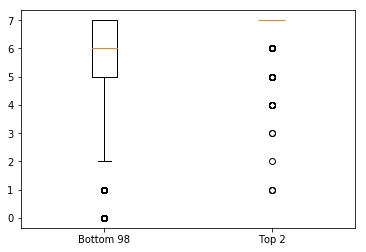

In [89]:

plt.boxplot([copy_math_98['GoodAtMath?'], 
            copy_math_2['GoodAtMath?']], labels=['Bottom 98', 'Top 2'])

**39% of the bottom 98** claim strongly that they're good at math, as opposed to **85% of the top 2**. Furthermore, the spread of responses is much larger from the bottom 98 when examining the box plot and histograms directly above.

## Most Americans are worried about retirement

In [36]:
data = df.loc[df['DegreeOfWorryAboutRetirement'] <= 7]


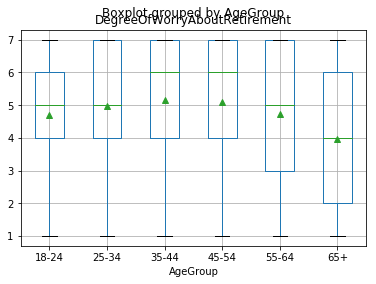

In [37]:
data.boxplot(column='DegreeOfWorryAboutRetirement', by="AgeGroup", showmeans=True)


_______________________________________________________________________


## Most Americans own a savings account.

In [ ]:
data = df.loc[df['SavingsAccount?'] <= 2]

Code like right above is just acquiring the values from the dataframe that only have 1 (i.e. 'yes') or 2 (i.e. 'no').  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df575d5c0>]],
      dtype=object)

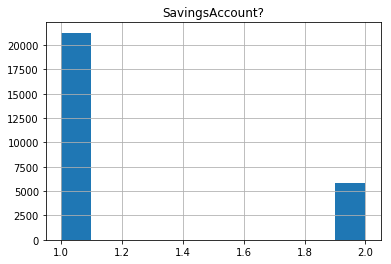

In [41]:
data.hist(column = 'SavingsAccount?')

______________________________________________________________________

In [ ]:
data = df.loc[df['OwnHome?'] <= 2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df1d10b38>]],
      dtype=object)

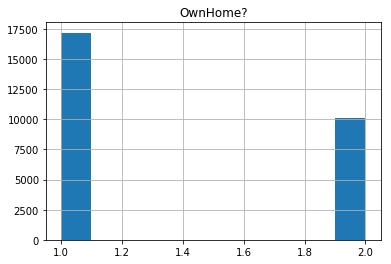

In [44]:
data.hist(column = 'OwnHome?')

In [45]:
data['OwnHome?'].describe()

count    27309.000000
mean         1.370427
std          0.482928
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: OwnHome?, dtype: float64

In [51]:
own_home= data.loc[data['OwnHome?'] == 1]['OwnHome?'].count()

In [52]:
rent_home = data.loc[data['OwnHome?'] == 2]['OwnHome?'].count()

In [55]:
stats = own_home/(float(rent_home)+own_home)*100

In [56]:
stats


62.9572668351093

Noteworthy to point out that 63% of surveyees own a home. It is worth investigating: is there a difference between the financial literacy score between those who own a home and those who do not? Let's find out...

In [58]:
df_owners = data.loc[data['OwnHome?'] == 1]

In [59]:
df_renters = data.loc[data['OwnHome?']==2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df1bf4358>]],
      dtype=object)

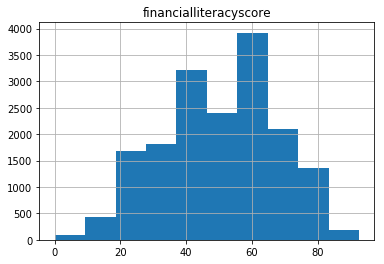

In [60]:
df_owners.hist(column = 'financialliteracyscore')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df1bb9358>]],
      dtype=object)

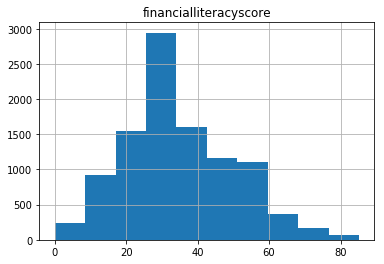

In [61]:
df_renters.hist(column = 'financialliteracyscore')

Oh wow. That looks quite drastic.  The financial literacy score of those who rent have an average that is centered more to the left than the average of the scores of homeowners.

In [64]:
df_owners['financialliteracyscore'].describe()

count    17193.000000
mean        49.411151
std         17.396916
min          0.000000
25%         37.037037
50%         51.851852
75%         62.962963
max         92.592593
Name: financialliteracyscore, dtype: float64

In [65]:
df_renters['financialliteracyscore'].describe()

count    10116.000000
mean        34.586207
std         15.365730
min          0.000000
25%         22.222222
50%         33.333333
75%         44.444444
max         85.185185
Name: financialliteracyscore, dtype: float64